In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = '.\\titanic_data.csv'
data = pd.read_csv(filename)
data

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


## Task 1.1
Compute average `Age` of passengers and number of passengers who survived and not survived 
grouped by `Sex` and `Passenger Class` (24 numbers);

In [3]:
round(data.groupby(['Passenger Class','Sex','Survived']).Age.agg({'count','mean'}), 2)

count   mean
Passenger Class Sex    Survived              
First           Female No            5  35.20
                       Yes         128  37.11
                Male   No           98  43.66
                       Yes          53  36.17
Second          Female No           11  34.09
                       Yes          92  26.71
                Male   No          135  33.09
                       Yes          23  17.45
Third           Female No           80  23.42
                       Yes          72  20.81
                Male   No          290  26.68
                       Yes          59  22.44

## Task 1.2
What can you say about survivors based on the resulting table (open question), e.g. what is the surviving ratio for females in First class compared to the Second and Third?

Let's check deviation of quantity between survived persons from different classes.

In [4]:
data.groupby(['Passenger Class','Sex']).Name.agg({'count'})

count
Passenger Class Sex          
First           Female    144
                Male      179
Second          Female    106
                Male      171
Third           Female    216
                Male      493

In [5]:
data.groupby(['Passenger Class','Sex','Survived']).Name.agg({'count'})

count
Passenger Class Sex    Survived       
First           Female No            5
                       Yes         139
                Male   No          118
                       Yes          61
Second          Female No           12
                       Yes          94
                Male   No          146
                       Yes          25
Third           Female No          110
                       Yes         106
                Male   No          418
                       Yes          75

To compare females from different classes let's find ratio survived/all passengers for each class. (to be honest with data)

Here it is:
- 139/144 for the first class. == ‭‭‭0,9652777777777778‬
- 94/106 for the second class. == ‭‭‭‭0,8867924528301887‬
- 106/216 for the third class. == ‭0,4907407407407407‬

The coef. show that to survive being woman you need to be in the first class and you have more than 95% chance to survive. Second class is also have a chance, but more lucky one.

## Task 1.3
What is the average number of males and females on all boats (rounded to the closest integer)? 

In [6]:
round(data.dropna(subset=['Life Boat']).groupby(['Life Boat','Sex']).Name.agg('count').reset_index().groupby('Sex').agg('mean'))

,Name
Sex,
Female,14.0
Male,7.0


In [7]:
data_copy = data.copy()

In [8]:
data_copy.drop(['Life Boat'], axis = 1, inplace = True)

## Task 2.1
Generate new attribute `Family size`: sum up `No of Parents or Children on Board` and `No of Siblings or Spouses on Board` and add 1. What is the average family size? In which class did the biggest family travel?

In [9]:
data_copy['Family Size'] = data_copy['No of Siblings or Spouses on Board'] + data_copy['No of Parents or Children on Board'] + 1

In [10]:
round(data_copy[['Ticket Number','Family Size']].drop_duplicates()['Family Size'].mean(), 2)

1.44

In [11]:
data_copy.groupby('Passenger Class')['Family Size'].agg('max')

Passenger Class
First      6
Second     6
Third     11
Name: Family Size, dtype: int64

## Task 2.2
It seems that `Passenger Fare` is total among all passengers with the same `Ticket Number`: create new attribute `Single passenger fare`. For every passenger you need to compute the number of passengers with the same `Ticket Number` and then use this number as a divisor for `Passenger Fare`.

In [12]:
ticket_value = data_copy.groupby('Ticket Number')['Passenger Fare'].agg({'mean','count'}).reset_index().copy()

In [13]:
ticket_value['ticket_value'] = ticket_value['mean'] / ticket_value['count']

In [14]:
ticket_value

,Ticket Number,count,mean,ticket_value
0,110152,3,86.500,28.833333
1,110413,3,79.650,26.550000
2,110465,2,52.000,26.000000
3,110469,1,26.000,26.000000
4,110489,1,26.550,26.550000
...,...,...,...,...
924,W./C. 6608,5,34.375,6.875000
925,W./C. 6609,1,7.550,7.550000
926,W.E.P. 5734,2,61.175,30.587500
927,W/C 14208,1,10.500,10.500000


In [15]:
ticket_value_join = ticket_value.set_index(['Ticket Number']).drop(['count','mean'] ,axis = 1)

In [16]:
data_copy = data_copy.join(ticket_value_join, how = 'left', on = 'Ticket Number',rsuffix='ticket_value')

In [17]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Survived                            1309 non-null   object 
 11  Family Size                         1309 no

In [18]:
round(data_copy.groupby('Passenger Class')['ticket_value'].mean(), 2)

Passenger Class
First     33.91
Second    11.41
Third      7.33
Name: ticket_value, dtype: float64

## Task 2.3
Impute missing values: for numerical attributes use averaging over three groups: `Passenger Class`, `Sex`, `Embarkation Port`; for every numerical attribute create separate column that contain 1 for imputed value and 0 for originally presented.

In [19]:
data_copy['Age_null'] = 0
data_copy['Passenger_Fare_null'] = 0

In [20]:
data_copy['Passenger_Fare_null'][data_copy['Age'].isna() == True] = 1

<ipython-input-20-70c2a9344171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Passenger_Fare_null'][data_copy['Age'].isna() == True] = 1


In [21]:
def average(a,b,c,i):
    return data_copy.groupby(['Passenger Class','Sex','Port of Embarkation'])[i].mean()[a][b][c]

In [22]:
lisn = []
for i in data_copy.columns:
    if data_copy[i].dtype != 'O' and any(data_copy[i].isna()):
        lisn.append(i)
lisn     

['Age', 'Passenger Fare', 'ticket_value']

In [23]:
for i in lisn:
    data_copy[i][data_copy[i].isna() == True] = data_copy[data_copy[i].isna() == True].apply(lambda x: average(x['Passenger Class'], x['Sex'], x['Port of Embarkation'], i), axis = 1)

<ipython-input-23-ff5f9f1a118d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy[i][data_copy[i].isna() == True] = data_copy[data_copy[i].isna() == True].apply(lambda x: average(x['Passenger Class'], x['Sex'], x['Port of Embarkation'], i), axis = 1)


In [24]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1309 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1309 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Survived                            1309 non-null   object 
 11  Family Size                         1309 no

## Task 2.4
Pre-process categorical attributes: For every categorical attribute create a separate column that contains 1 for a missing value and 0 for originally presented. One-hot encode categorical attributes with less than 20 unique values, drop other categorical attributes; drop original attributes.

In [25]:
lis_cat = []
for i in data_copy.columns:
    if data_copy[i].dtype == 'object' and any(data_copy[i].isna()):
        lis_cat.append(i)
lis_cat     

['Cabin', 'Port of Embarkation']

In [26]:
lis_cat_20 = []
for i in data_copy.columns:
    if data_copy[i].dtype == 'object' and data_copy[i].nunique() < 20:
        lis_cat_20.append(i)
lis_cat_20.remove('Survived')
lis_cat_20

['Passenger Class', 'Sex', 'Port of Embarkation']

In [27]:
for i in lis_cat:
    data_copy[i+'_null'] = 0
    data_copy[i+'_null'][data_copy[i].isna() == True] = 1
    data_copy.drop(i, axis = 1)

<ipython-input-27-23c6b21bbd6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy[i+'_null'][data_copy[i].isna() == True] = 1


In [28]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1309 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1309 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Survived                            1309 non-null   object 
 11  Family Size                         1309 no

## Task 3.1
Compute classification accuracy on a train-test setup:
1. Create a Cross Validation block, fix the random_state parameter to 2020.
2. Use a decision tree with `maximal depth` = 7; uncheck `apply pruning` box; leave all other parameters by default.
3. Use accuracy as a performance metric

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
trans = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [31]:
for i in lis_cat_20:
    data_copy[i] = data_copy[i].fillna('NANCAT')

In [32]:
OH_cols = pd.DataFrame(trans.fit_transform(data_copy[lis_cat_20]))
OH_cols.index = data_copy.index
data_copy = data_copy.drop(lis_cat_20, axis=1)
data_copy = pd.concat([data_copy, OH_cols], axis=1)

In [33]:
lis_cat_m20 = []
for i in data_copy.columns:
    if data_copy[i].dtype == 'object' and data_copy[i].nunique() > 20:
        lis_cat_m20.append(i)
lis_cat_m20        

['Name', 'Ticket Number', 'Cabin']

In [34]:
data_copy = data_copy.drop(lis_cat_m20, axis = 1)

In [35]:
data_copy.Survived = data_copy.Survived.map({'Yes':1, 'No':0})

In [36]:
y = data_copy.Survived
X = data_copy.drop('Survived', axis = 1)

In [37]:
data_copy

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived,Family Size,ticket_value,Age_null,Passenger_Fare_null,Cabin_null,Port of Embarkation_null,0,1,2,3,4,5,6,7,8
0,29.000000,0,0,211.3375,1,1,52.834375,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.916700,1,2,151.5500,1,4,25.258333,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.000000,1,2,151.5500,0,4,25.258333,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,30.000000,1,2,151.5500,0,4,25.258333,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,25.000000,1,2,151.5500,0,4,25.258333,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.500000,1,0,14.4542,0,2,7.227100,0,0,1,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1305,16.818182,1,0,14.4542,0,2,7.227100,0,1,1,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1306,26.500000,0,0,7.2250,0,1,7.225000,0,0,1,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1307,27.000000,0,0,7.2250,0,1,7.225000,0,0,1,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
model = DecisionTreeClassifier(max_depth = 7, random_state=2020)

In [40]:
cv = KFold(5)

In [52]:
scores = cross_val_score(model, 
                         X, 
                         y,
                         cv=cv,
                         scoring='accuracy'
                        )

print(round(np.mean(scores), 2))

0.76


In [53]:
print(round(np.std(scores), 2))

0.05


In [42]:
scores = cross_val_predict(model, 
                         X, 
                         y,
                         cv=cv
                        )
scores

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Task 3.2
Analyze the resulting confusion matrix, which error is larger: Type I or Type II? 

In [43]:
confusion_matrix(y, scores)

array([[677, 132],
       [176, 324]], dtype=int64)

We see above that we have more than 600 True Positive predictions and more than 300 True Negative. It is bad result, because False Negative is 132. It means that we say: hey, you are not gonna die tonight, but... it happens. Again BUTT. Like in medicine cancer prediction.

In [44]:
print(classification_report(y, scores))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       809
           1       0.71      0.65      0.68       500

    accuracy                           0.76      1309
   macro avg       0.75      0.74      0.75      1309
weighted avg       0.76      0.76      0.76      1309



## Task 3.3
Provide a short analysis of the results, based on your answers III.2-III.3. E.g.
What are the splitting features of the first 3 levels of the best tree (up to 7
attributes)? Do these results coincide with your intuition? You may include
some misclassified examples along with explanations why they were
misclassified.

In [45]:
from io import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [46]:
list_fold = KFold(5).split(X)
max_accuracy= 0
max_iter = 0
itter = 0
for train_index, test_index in list_fold:
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accur = accuracy_score(y_test, pred)
    itter += 1
    if max_accuracy < accur:
        max_accuracy = accur
        max_iter = itter
    if itter == 2:
        model_iter2_fit = model.fit(X_train, y_train)
print(max_accuracy, max_iter)

0.8435114503816794 2


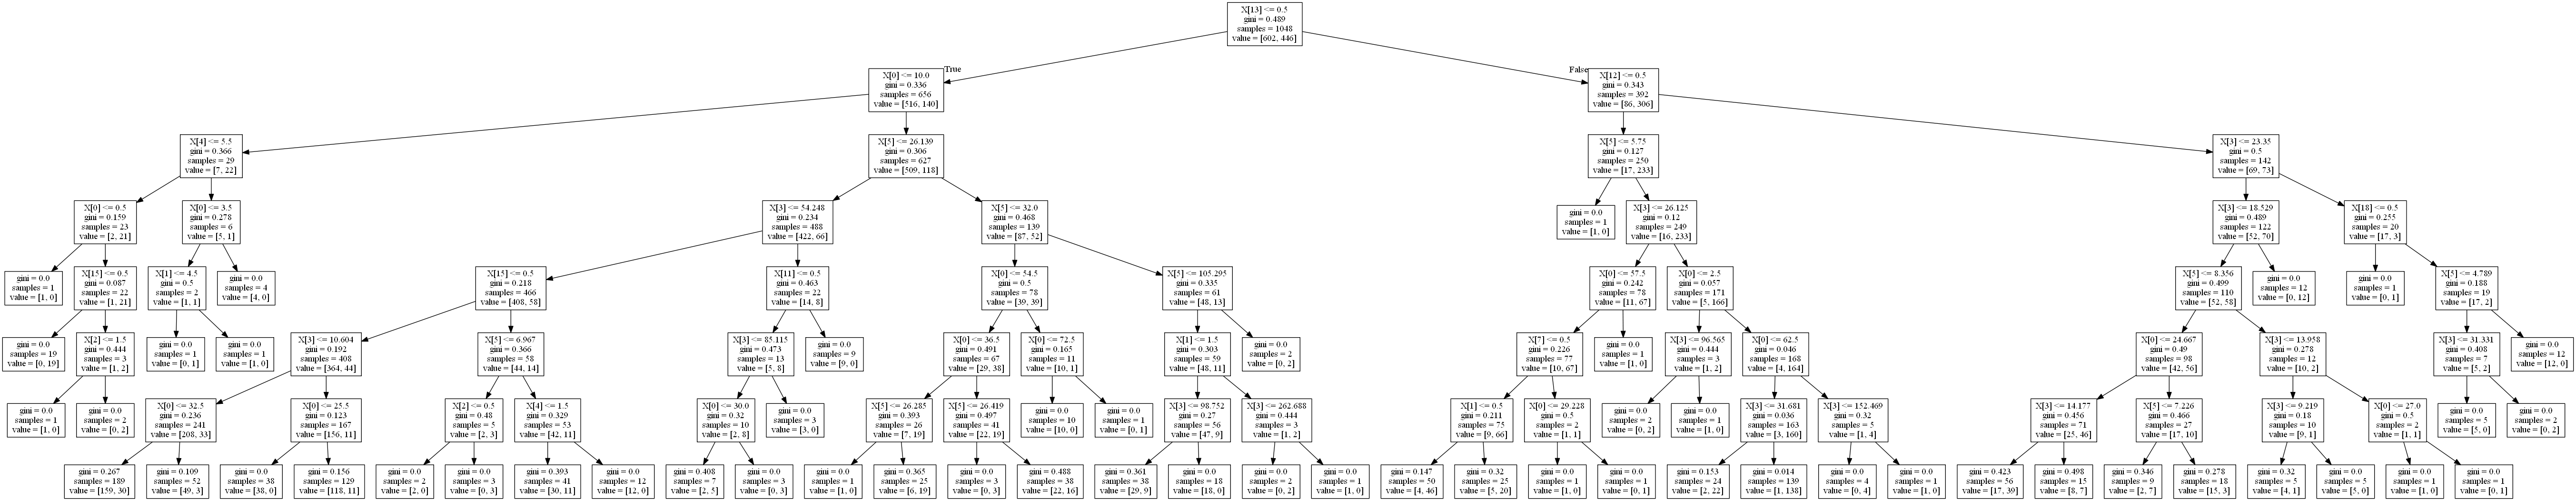

In [47]:
out = StringIO()
export_graphviz(model_iter2_fit, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [48]:
pd.DataFrame({'feature_importances_':list(model_iter2_fit.feature_importances_), 'columns':data_copy.columns.drop('Survived')}).sort_values(by="feature_importances_", ascending = False)

,feature_importances_,columns
13,0.502917,3
0,0.120478,Age
5,0.112676,ticket_value
12,0.100767,2
3,0.093695,Passenger Fare
4,0.021146,Family Size
11,0.012831,1
2,0.011892,No of Parents or Children on Board
1,0.009358,No of Siblings or Spouses on Board
15,0.007603,5


The most valuable attributes are:

- passenger Class_third
- Age
- ticket_value
- passenger Class_second
- PAssenger Fare
- Family Size
- passenger Class_first

In previous tasks I saw that the class is the most valueable influencer in defining the survivability. I suppose that ticket value connects with class and Age connects to children (<= 10 in tree).